# Importing Libraries

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
%matplotlib inline

# Load Dataset

In [178]:
mushroom=pd.read_csv("mushrooms.csv")
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [179]:
mushroom.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [180]:
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [181]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [182]:
for column in mushroom.columns:
    if mushroom[column].dtype==object:
        print(str(column)+':'+str(mushroom[column].unique()))
        print(mushroom[column].value_counts())
        
print("_______")    

class:['p' 'e']
e    4208
p    3916
Name: class, dtype: int64
cap-shape:['x' 'b' 's' 'f' 'k' 'c']
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
cap-surface:['s' 'y' 'f' 'g']
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
cap-color:['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
bruises:['t' 'f']
f    4748
t    3376
Name: bruises, dtype: int64
odor:['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
gill-attachment:['f' 'a']
f    7914
a     210
Name: gill-attachment, dtype: int64
gill-spacing:['c' 'w']
c    6812
w    1312
Name: gill-spacing, dtype: int64
gill-size:['n' 'b']
b    5612
n    2512
Name: gill-size, dtype: int64
gill-color:['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
b    1728
p    

# Change to Numeric

# Label Encoding

In [183]:
from sklearn.preprocessing import LabelEncoder

for column in mushroom.columns:
    if mushroom[column].dtype==np.number:
        continue
    mushroom[column]=LabelEncoder().fit_transform(mushroom[column]) 

<ipython-input-183-6763387b200d>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if mushroom[column].dtype==np.number:


In [184]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [185]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Skewness

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

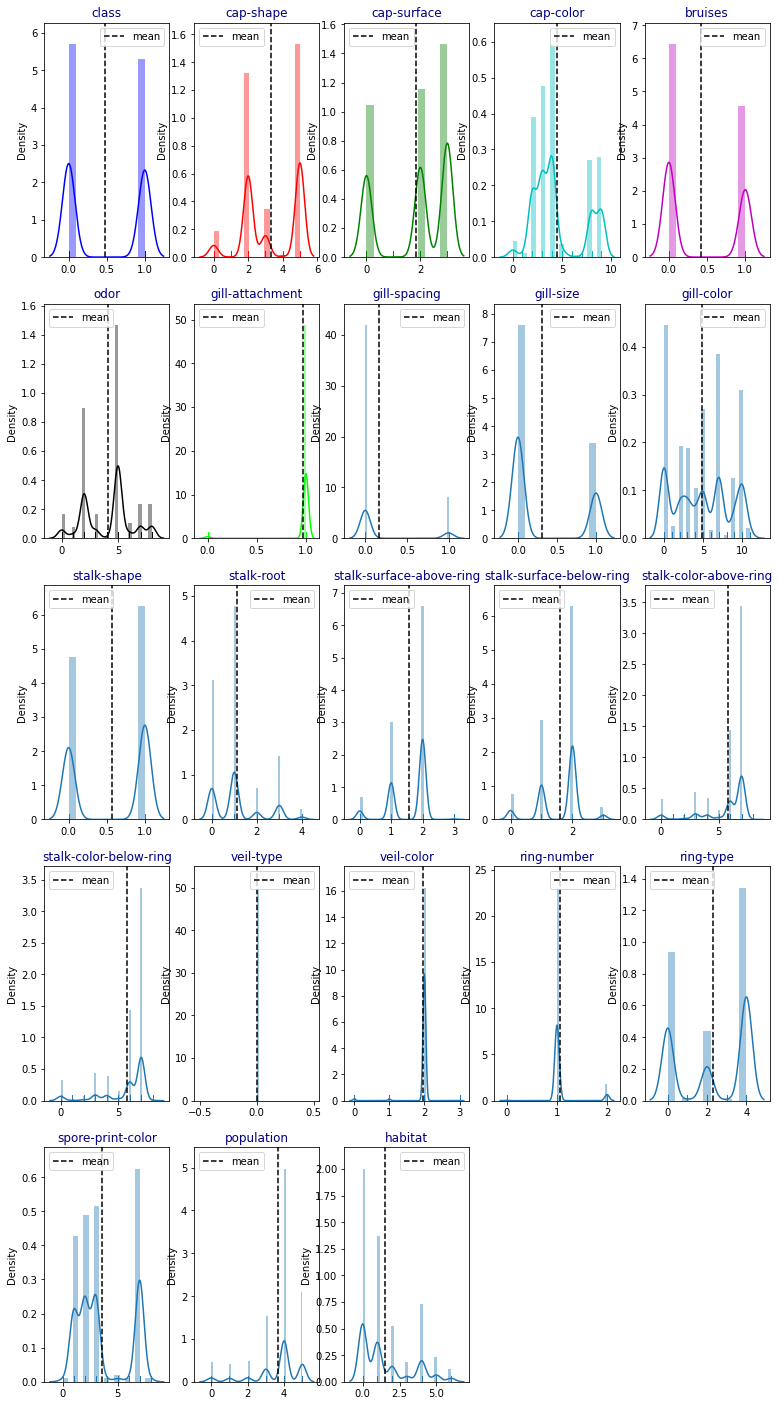

In [186]:
import itertools
cols=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
length=len(cols)
cs=["b","r","g","c","m","k","lime"]
fig=plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(5,5,j+1)
    ax=sns.distplot(mushroom[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(mushroom[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

# Check Outliers

class                          AxesSubplot(0.125,0.772143;0.168478x0.107857)
cap-shape                   AxesSubplot(0.327174,0.772143;0.168478x0.107857)
cap-surface                 AxesSubplot(0.529348,0.772143;0.168478x0.107857)
cap-color                   AxesSubplot(0.731522,0.772143;0.168478x0.107857)
bruises                        AxesSubplot(0.125,0.642714;0.168478x0.107857)
odor                        AxesSubplot(0.327174,0.642714;0.168478x0.107857)
gill-attachment             AxesSubplot(0.529348,0.642714;0.168478x0.107857)
gill-spacing                AxesSubplot(0.731522,0.642714;0.168478x0.107857)
gill-size                      AxesSubplot(0.125,0.513286;0.168478x0.107857)
gill-color                  AxesSubplot(0.327174,0.513286;0.168478x0.107857)
stalk-shape                 AxesSubplot(0.529348,0.513286;0.168478x0.107857)
stalk-root                  AxesSubplot(0.731522,0.513286;0.168478x0.107857)
stalk-surface-above-ring       AxesSubplot(0.125,0.383857;0.168478x0.107857)

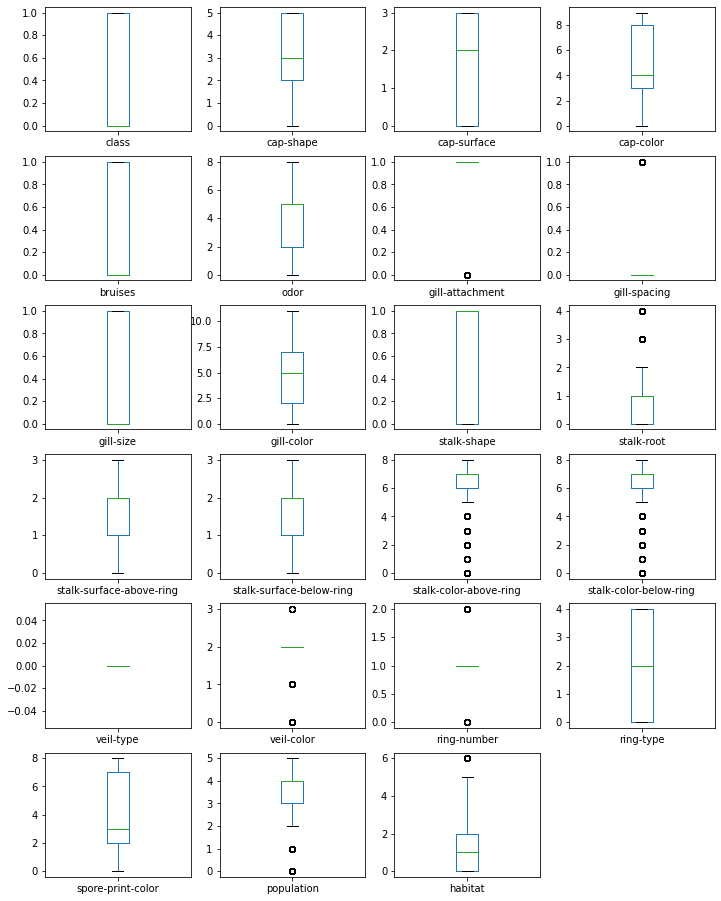

In [187]:
mushroom.plot(kind='box',subplots=True,layout=(6,4),figsize=(12,16))

In [188]:
mushroom.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


# Remove Skewness

# Removing Outliers using z score

# IQR

In [189]:
q1=mushroom.quantile(0.25)
q3=mushroom.quantile(0.75)
IQR=q3-q1
print(IQR)

class                       1.0
cap-shape                   3.0
cap-surface                 3.0
cap-color                   5.0
bruises                     1.0
odor                        3.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   1.0
gill-color                  5.0
stalk-shape                 1.0
stalk-root                  1.0
stalk-surface-above-ring    1.0
stalk-surface-below-ring    1.0
stalk-color-above-ring      1.0
stalk-color-below-ring      1.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   4.0
spore-print-color           5.0
population                  1.0
habitat                     2.0
dtype: float64


In [190]:
mushroom_new=mushroom[~((mushroom<(q1-1.5*IQR))|(mushroom>(q3+1.5*IQR))).any(axis=1)]
print(mushroom_new.shape)

(3600, 23)


In [191]:
mushroom.shape

(8124, 23)

In [192]:
# Lose percentage
percentage_loss=((4524)/8124)*100   
print(percentage_loss)

55.686853766617425


In [193]:
mushroom.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

There is huge percentage loss.So we will not accept it

<AxesSubplot:xlabel='class', ylabel='gill-attachment'>

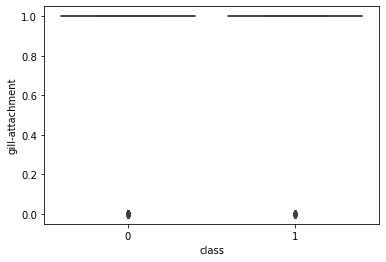

In [194]:
sns.boxplot(x='class',y='gill-attachment',data=mushroom)

In [195]:
mushroom=mushroom[mushroom['gill-attachment']>0]

In [196]:
mushroom.shape

(7914, 23)

class                          AxesSubplot(0.125,0.772143;0.168478x0.107857)
cap-shape                   AxesSubplot(0.327174,0.772143;0.168478x0.107857)
cap-surface                 AxesSubplot(0.529348,0.772143;0.168478x0.107857)
cap-color                   AxesSubplot(0.731522,0.772143;0.168478x0.107857)
bruises                        AxesSubplot(0.125,0.642714;0.168478x0.107857)
odor                        AxesSubplot(0.327174,0.642714;0.168478x0.107857)
gill-attachment             AxesSubplot(0.529348,0.642714;0.168478x0.107857)
gill-spacing                AxesSubplot(0.731522,0.642714;0.168478x0.107857)
gill-size                      AxesSubplot(0.125,0.513286;0.168478x0.107857)
gill-color                  AxesSubplot(0.327174,0.513286;0.168478x0.107857)
stalk-shape                 AxesSubplot(0.529348,0.513286;0.168478x0.107857)
stalk-root                  AxesSubplot(0.731522,0.513286;0.168478x0.107857)
stalk-surface-above-ring       AxesSubplot(0.125,0.383857;0.168478x0.107857)

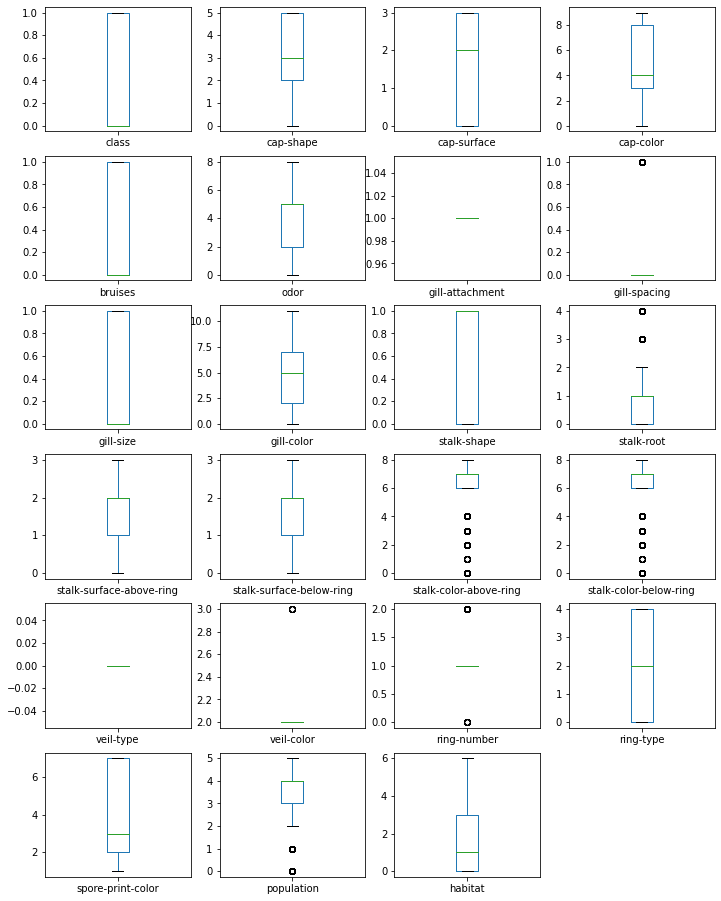

In [197]:
mushroom.plot(kind='box',subplots=True,layout=(6,4),figsize=(12,16))

In [198]:
mushroom.shape

(7914, 23)

The correlation of stalk-surface-above-ring,stalk-surface-below-ring and veil-color id not good with class. Even there are outliers. That's why let me delete those columns

In [199]:
mushroom.drop(['stalk-color-above-ring','stalk-color-below-ring','veil-color'],inplace=True,axis=1)

class                          AxesSubplot(0.125,0.772143;0.168478x0.107857)
cap-shape                   AxesSubplot(0.327174,0.772143;0.168478x0.107857)
cap-surface                 AxesSubplot(0.529348,0.772143;0.168478x0.107857)
cap-color                   AxesSubplot(0.731522,0.772143;0.168478x0.107857)
bruises                        AxesSubplot(0.125,0.642714;0.168478x0.107857)
odor                        AxesSubplot(0.327174,0.642714;0.168478x0.107857)
gill-attachment             AxesSubplot(0.529348,0.642714;0.168478x0.107857)
gill-spacing                AxesSubplot(0.731522,0.642714;0.168478x0.107857)
gill-size                      AxesSubplot(0.125,0.513286;0.168478x0.107857)
gill-color                  AxesSubplot(0.327174,0.513286;0.168478x0.107857)
stalk-shape                 AxesSubplot(0.529348,0.513286;0.168478x0.107857)
stalk-root                  AxesSubplot(0.731522,0.513286;0.168478x0.107857)
stalk-surface-above-ring       AxesSubplot(0.125,0.383857;0.168478x0.107857)

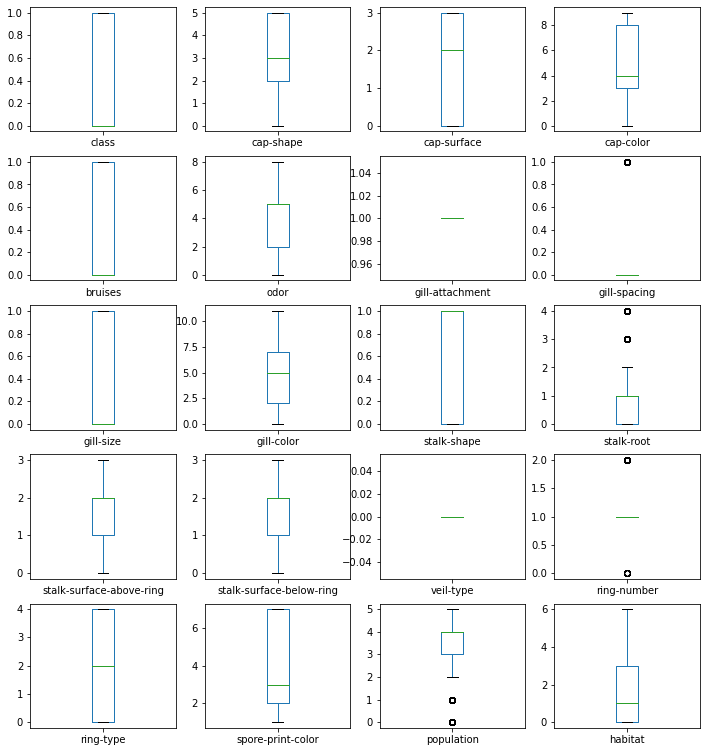

In [200]:
mushroom.plot(kind='box',subplots=True,layout=(6,4),figsize=(12,16))

In [201]:
dataFrame = pd.DataFrame(data=mushroom)
skewValue = dataFrame.skew(axis=1)
print(skewValue)

0       0.474484
1       1.828193
2       1.483308
3       0.806708
4       0.764349
          ...   
8113    1.828736
8116    1.371402
8117    1.875928
8118    1.577621
8122    1.528697
Length: 7914, dtype: float64


# Preparing Data for Model

In [202]:
#Prepare the dataset for training the model
x=mushroom.drop('class',axis=1)
y=mushroom['class']

# Remove Skewness

In [203]:
from sklearn.preprocessing import power_transform     #box-cox is only for positive but yeo-johnson is for both negative and positive
x=power_transform(x,method='yeo-johnson')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [204]:
x.shape

(7914, 19)

# Classification Model Building

# PCA

In [209]:
pca=PCA(n_components=10)
#pca=PCA(25)

In [210]:
x=pca.fit_transform(x)

In [211]:
x.shape

(7914, 10)

# Standard Scaler

In [218]:
sc=StandardScaler()

In [219]:
x_t=sc.fit_transform(x)

# Best Random State

In [224]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [225]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model performs very well")
        print("At random state :-",i)
        print("Training r2_score is :-",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is :-",r2_score(y_test,pred_test)*100)

At random state 520 The model performs very well
At random state :- 520
Training r2_score is :- 68.22126618117584
Testing r2_score is :- 68.22088400786996


In [230]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=520)

In [233]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,"is: ")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is: 
0.9018369690011481
[[843  52]
 [119 728]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       895
           1       0.93      0.86      0.89       847

    accuracy                           0.90      1742
   macro avg       0.90      0.90      0.90      1742
weighted avg       0.90      0.90      0.90      1742



Accuracy score of GaussianNB() is: 
0.9293915040183697
[[854  41]
 [ 82 765]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       895
           1       0.95      0.90      0.93       847

    accuracy                           0.93      1742
   macro avg       0.93      0.93      0.93      1742
weighted avg       0.93      0.93      0.93      1742



Accuracy score of SVC() is: 
0.9982778415614236
[[892   3]
 [  0 847]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       89

# Accuracy score of SVC() is: 0.9982778415614236. SVC have given me the best result. The accuracy rate is 99%

# Saving the model

In [234]:
import pickle
filename='Mushroom.pkl'
pickle.dump(SVC(),open(filename,'wb'))